## Introduction
This notebook dedicated to plot the follow graph:
1) x axis time (yyyy-mm) : y axis (OCR + (Labour force status))

2) x axis time (yyyy-mm) :  y axis (Tourism international visitors arrivals) + nzd-usd-exchange rate

3) x axis (OCR from low to high value) : y axis (CPI from low to high value)
    [cut in the Official Cash Rate (OCR) leads to an increase in inflation and GDP growth]
    [References : https://www.rbnz.govt.nz/-/media/d0024c4168944dc6a502b497cdd5d46c.ashx]

4) x axis (CPI), y axis (HPI)
    [It is anticipated that as CPI increases, HPI also increases]

5) x axis OCR, y axis NZD vs. USD
    [If we raise the OCR, banks' interest rates also tend to increase and vice versa.
    This is because the OCR influences the banks' costs, so as with any business, changes in costs are passed on in their prices.
    A decrease in banks' interest rates usually results in people spending more.]

6) x axis (OCR) : y axis CPI
    [The OCR increase creates an increase in interest rates, which means people borrow less and are incentivised to save.
    When people spend less, demand decreases. A decrease in demand reduces pressure for prices to rise, therefore reducing inflation]


7) x axis (OCR) : State Highway Traffice Volumns
    [Increase OCR, increase interest rate, spend less, we are expecting reduction of the traffice volumns]

In [130]:
# install.packages("ggcorrplot")
library(tidyverse)
library(ggplot2)
library(gtable)
library(grid)
library(ggcorrplot)
library(visdat)

Rows: 95
Columns: 8
$ date.quarter     <chr> "1999-03", "1999-06", "1999-09", "1999-12", "2000-03"~
$ ocr_quarter      <dbl> 4.500000, 4.500000, 4.500000, 4.666667, 5.583333, 6.3~
$ CPI              <dbl> -0.09, -0.36, -0.51, 0.51, 1.49, 2.00, 2.99, 3.98, 3.~
$ HPI              <dbl> 699, 703, 704, 704, 703, 696, 696, 696, 700, 698, 705~
$ ump_rate         <dbl> 7.6, 7.4, 7.0, 6.5, 6.6, 6.4, 6.1, 5.9, 5.6, 5.5, 5.5~
$ usd_rate_quarter <dbl> 0.5383333, 0.5426667, 0.5253333, 0.5120000, 0.4986667~
$ cny_rate_quarter <dbl> 4.457178, 4.496075, 4.349201, 4.235615, 4.119027, 3.9~
$ tourism_count    <dbl> 470759, 299030, 330065, 507624, 515170, 340265, 36168~


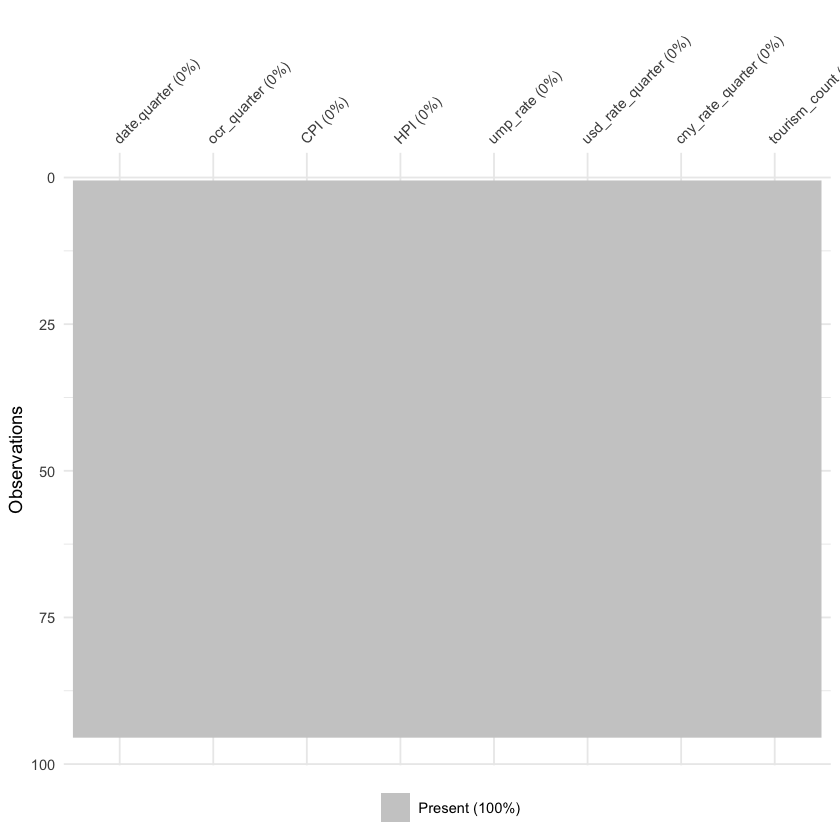

In [179]:
data <- read_csv("data/merge_data.csv", show_col_types = FALSE)

data %>% glimpse()
vis_miss(data)

In [136]:
row_nr <- data %>% nrow()
row_nr <- ceiling(row_nr / 4) * 4

x_idx = seq(from = 1, to = row_nr, by = 4)
x_breaks = data$date.quarter[x_idx]

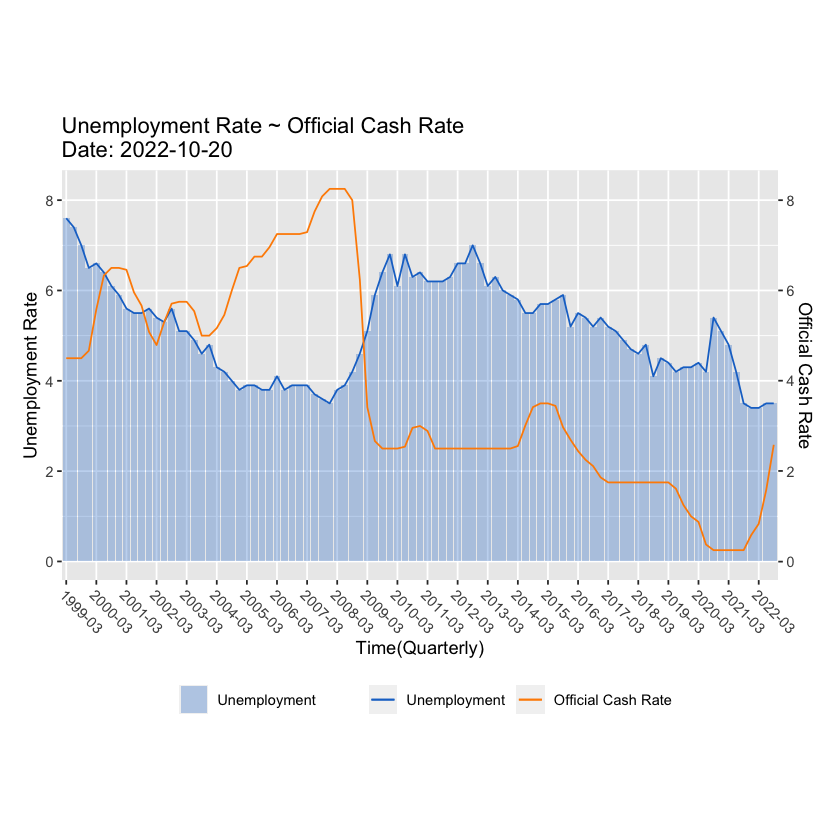

In [80]:
# 1. OCR + (Labour force status)
# options(repr.P.width = 8, repr.P.height = 4)
p1 <- ggplot(data, aes(x = date.quarter, y =  ump_rate, group = 1)) +
    geom_line(aes(col = "Unemployment")) +
    geom_bar(aes(y = ump_rate, fill = "Unemployment"), stat = "identity", alpha=.3) +
    geom_line(aes(y = ocr_quarter, col = "Official Cash Rate")) +
    scale_fill_manual(values = c("Unemployment" = "dodgerblue3")) +
    scale_x_discrete(name = "Time(Quarterly)", breaks = x_breaks) +
    scale_y_continuous(name = "Unemployment Rate",
        # Add a second axis and specify its features
        sec.axis = sec_axis(~., name = "Official Cash Rate")) + 
    scale_color_manual(values = c("Unemployment" = "dodgerblue3", "Official Cash Rate" = "darkorange")) +
    theme(legend.position="bottom", plot.margin=grid::unit(c(0,5,0,5), "mm")) +
    theme(axis.text.x = element_text(angle = -45, hjust = 0.001)) + 
    coord_fixed(ratio = 6) +
    labs(color = " ", fill = " ", 
       title = paste0("Unemployment Rate ~ Official Cash Rate\nDate: ", Sys.Date()))
p1

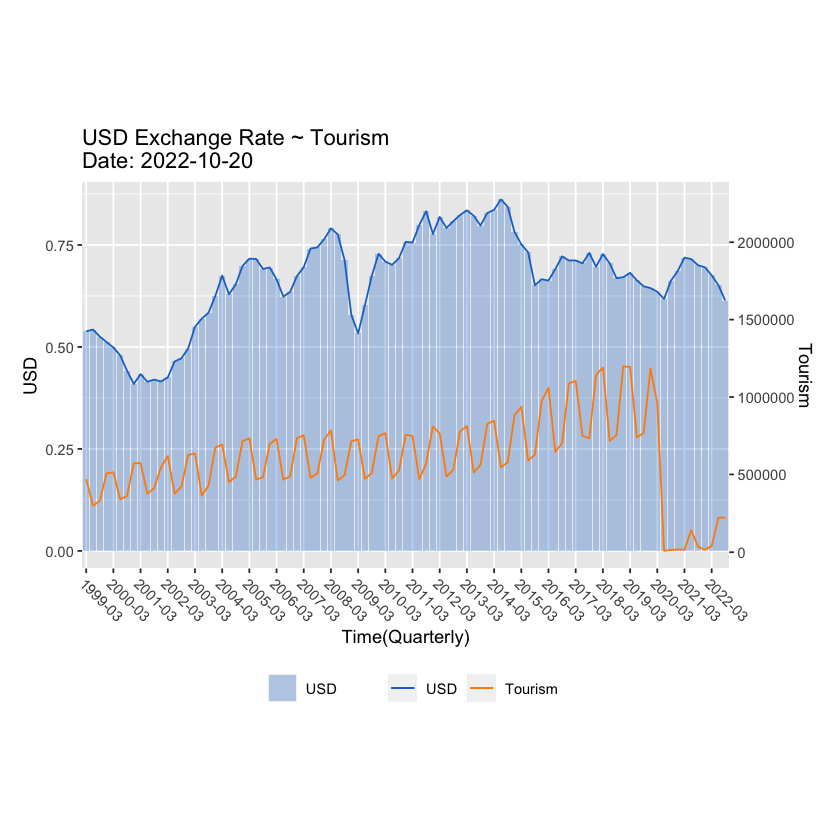

In [191]:
# 2.1 tourism & CPI
ss = get_scale_shift(data, "usd_rate_quarter", "tourism_count")
scale = ss[1]
shift = ss[2]
min_first = ss[3]
max_first = ss[4]

ggplot(data, aes(x = date.quarter, y =  usd_rate_quarter, group = 1)) +
    geom_line(aes(col = "USD")) +
    geom_bar(aes(y = usd_rate_quarter, fill = "USD"), stat = "identity", alpha=.3) +
    geom_line(aes(y = inv_scale_function(tourism_count, scale, shift), col = "Tourism")) +
    scale_fill_manual(values = c("USD" = "dodgerblue3")) +
    scale_x_discrete(name = "Time(Quarterly)", breaks = x_breaks) +
    scale_y_continuous(name = "USD",
        sec.axis = sec_axis(~scale_function(., scale, shift), name = "Tourism")) + 
    scale_color_manual(values = c("USD" = "dodgerblue3", "Tourism" = "darkorange")) +
    theme(legend.position="bottom", plot.margin=grid::unit(c(0,5,0,5), "mm")) +
    theme(axis.text.x = element_text(angle = -45, hjust = 0.001)) + 
    coord_fixed(ratio = 60) +
    labs(color = " ", fill = " ", 
       title = paste0("USD Exchange Rate ~ Tourism\nDate: ", Sys.Date()))

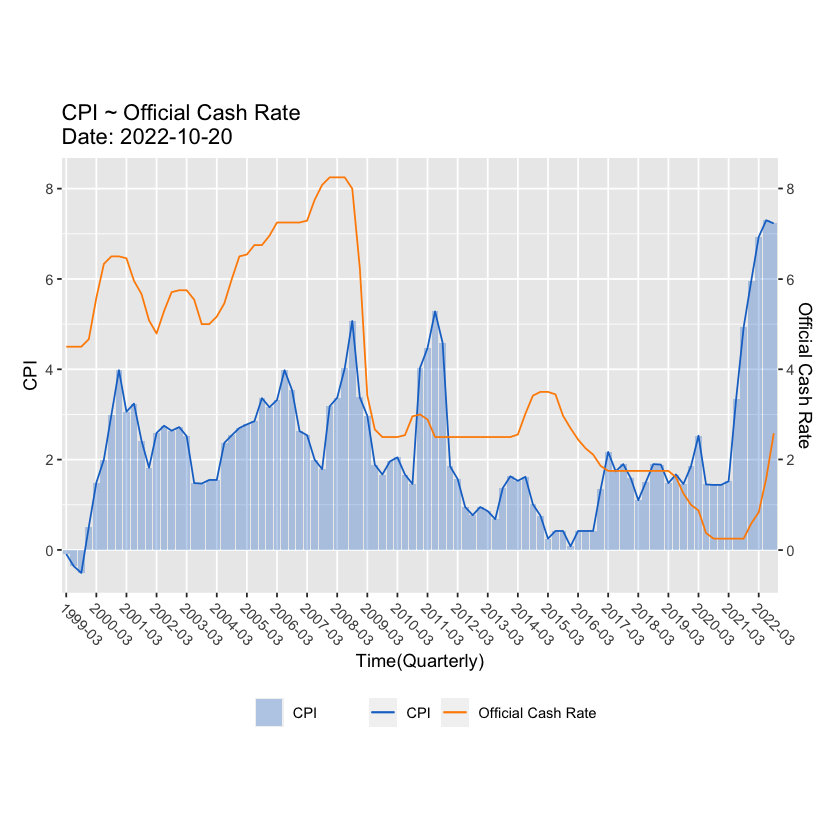

In [94]:
# 3. OCR ~ CPI
# options(repr.P.width = 8, repr.P.height = 4)
ggplot(data, aes(x = date.quarter, y =  CPI, group = 1)) +
    geom_line(aes(col = "CPI")) +
    geom_bar(aes(y = CPI, fill = "CPI"), stat = "identity", alpha=.3) +
    geom_line(aes(y = ocr_quarter, col = "Official Cash Rate")) +
    scale_fill_manual(values = c("CPI" = "dodgerblue3")) +
    scale_x_discrete(name = "Time(Quarterly)", breaks = x_breaks) +
    scale_y_continuous(name = "CPI",
        # Add a second axis and specify its features
        sec.axis = sec_axis(~., name = "Official Cash Rate")) + 
    scale_color_manual(values = c("CPI" = "dodgerblue3", "Official Cash Rate" = "darkorange")) +
    theme(legend.position="bottom", plot.margin=grid::unit(c(0,5,0,5), "mm")) +
    theme(axis.text.x = element_text(angle = -45, hjust = 0.001)) + 
    coord_fixed(ratio = 6) +
    labs(color = " ", fill = " ", 
       title = paste0("CPI ~ Official Cash Rate\nDate: ", Sys.Date()))

[1] -696.51

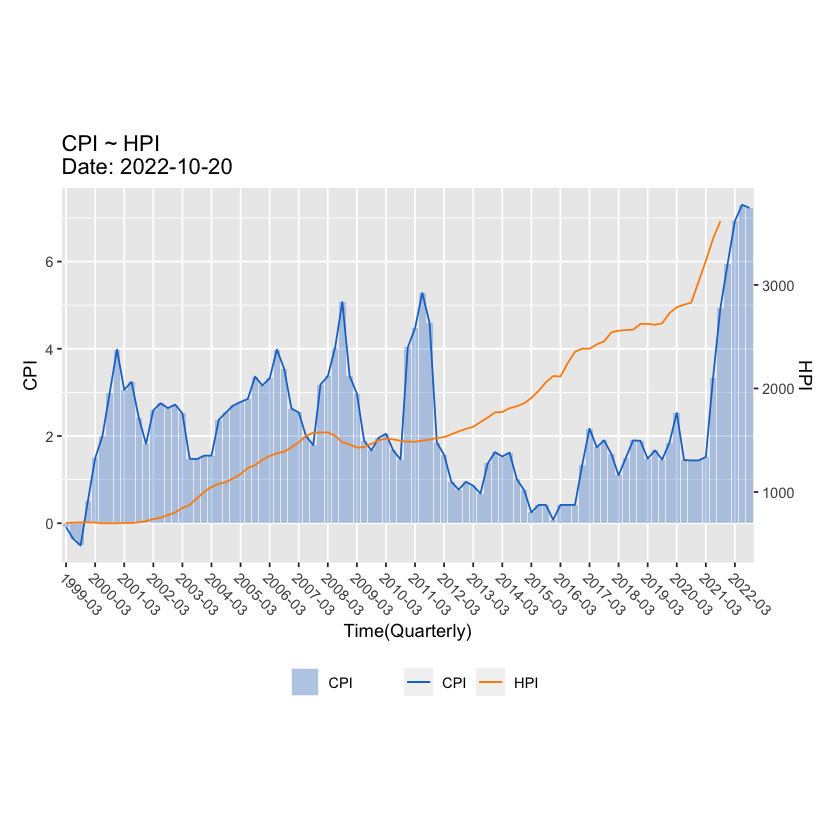

In [141]:
# 4. CPI ~ HPI
ss = get_scale_shift(data, "CPI", "HPI")
scale = ss[1]
shift = ss[2]
min_first = ss[3]
max_first = ss[4]

ggplot(data, aes(x = date.quarter, y =  CPI, group = 1)) +
    geom_line(aes(col = "CPI")) +
    geom_bar(aes(y = CPI, fill = "CPI"), stat = "identity", alpha=.3) +
    geom_line(aes(y = inv_scale_function(HPI, scale, shift), col = "HPI")) +
    scale_fill_manual(values = c("CPI" = "dodgerblue3")) +
    scale_x_discrete(name = "Time(Quarterly)", breaks = x_breaks) +
    scale_y_continuous(name = "CPI",
        limits = c(min_first, max_first),
        sec.axis = sec_axis(~scale_function(., scale, shift), name = "HPI")) + 
    scale_color_manual(values = c("CPI" = "dodgerblue3", "HPI" = "darkorange")) +
    theme(legend.position="bottom", plot.margin=grid::unit(c(0,5,0,5), "mm")) +
    theme(axis.text.x = element_text(angle = -45, hjust = 0.001)) + 
    coord_fixed(ratio = 6) +
    labs(color = " ", fill = " ", 
       title = paste0("CPI ~ HPI\nDate: ", Sys.Date()))


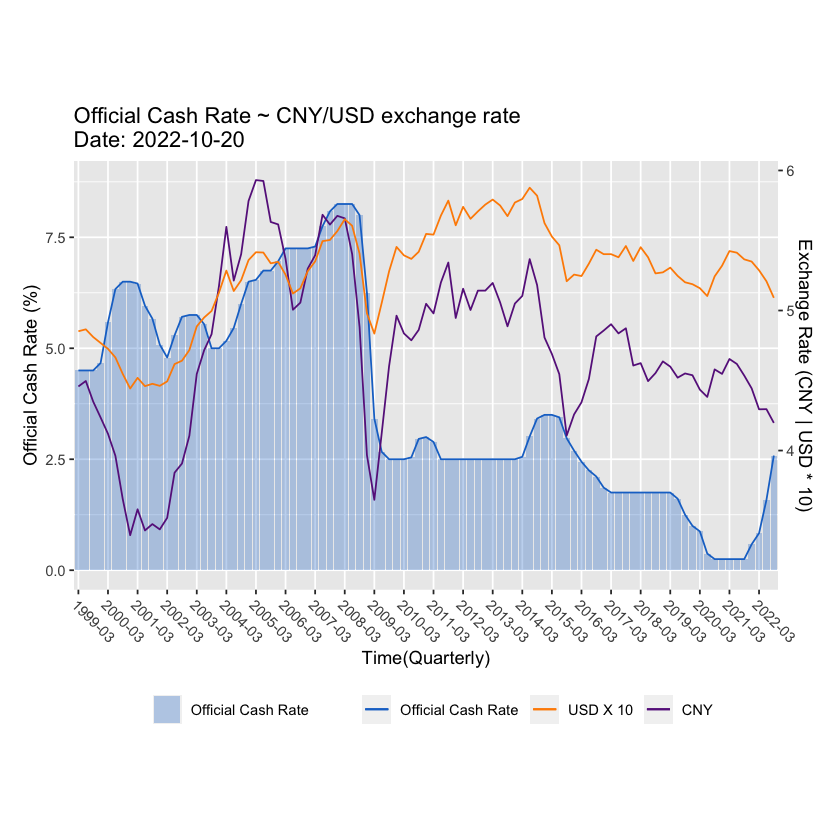

In [140]:
# 5. OCR ~ CNY/USD
ss = get_scale_shift(data, "ocr_quarter", "cny_rate_quarter")
scale = ss[1]
shift = ss[2]
min_first = ss[3]
max_first = ss[4]

ggplot(data, aes(x = date.quarter, y = ocr_quarter, group = 1)) +
    geom_line(aes(col = "Official Cash Rate")) +
    geom_bar(aes(y = ocr_quarter, fill = "Official Cash Rate"), stat = "identity", alpha=.3) +
    geom_line(aes(y = inv_scale_function(cny_rate_quarter, scale, shift), col = "CNY")) +
    geom_line(aes(y = (usd_rate_quarter * 10), col = "USD X 10")) +
    scale_fill_manual(values = c("Official Cash Rate" = "dodgerblue3")) +
    scale_x_discrete(name = "Time(Quarterly)", breaks = x_breaks) +
    scale_y_continuous(name = "Official Cash Rate (%)",
        #limits = c(min_first, max_first),
        sec.axis = sec_axis(~scale_function(., scale, shift), name = "Exchange Rate (CNY | USD * 10)")) + 
    scale_color_manual(values = c("Official Cash Rate" = "dodgerblue3", 
                    "USD X 10" = "darkorange", "CNY" = "darkorchid4")) +
    theme(legend.position="bottom", plot.margin=grid::unit(c(0,5,0,5), "mm")) +
    theme(axis.text.x = element_text(angle = -45, hjust = 0.001)) + 
    coord_fixed(ratio = 6) +
    labs(color = " ", fill = " ", 
       title = paste0("Official Cash Rate ~ CNY/USD exchange rate\nDate: ", Sys.Date()))


Rows: 95
Columns: 7
$ ocr_quarter      <dbl> 4.500000, 4.500000, 4.500000, 4.666667, 5.583333, 6.3~
$ CPI              <dbl> -0.09, -0.36, -0.51, 0.51, 1.49, 2.00, 2.99, 3.98, 3.~
$ HPI              <dbl> 699, 703, 704, 704, 703, 696, 696, 696, 700, 698, 705~
$ ump_rate         <dbl> 7.6, 7.4, 7.0, 6.5, 6.6, 6.4, 6.1, 5.9, 5.6, 5.5, 5.5~
$ usd_rate_quarter <dbl> 0.5383333, 0.5426667, 0.5253333, 0.5120000, 0.4986667~
$ cny_rate_quarter <dbl> 4.457178, 4.496075, 4.349201, 4.235615, 4.119027, 3.9~
$ tourism_count    <dbl> 470759, 299030, 330065, 507624, 515170, 340265, 36168~


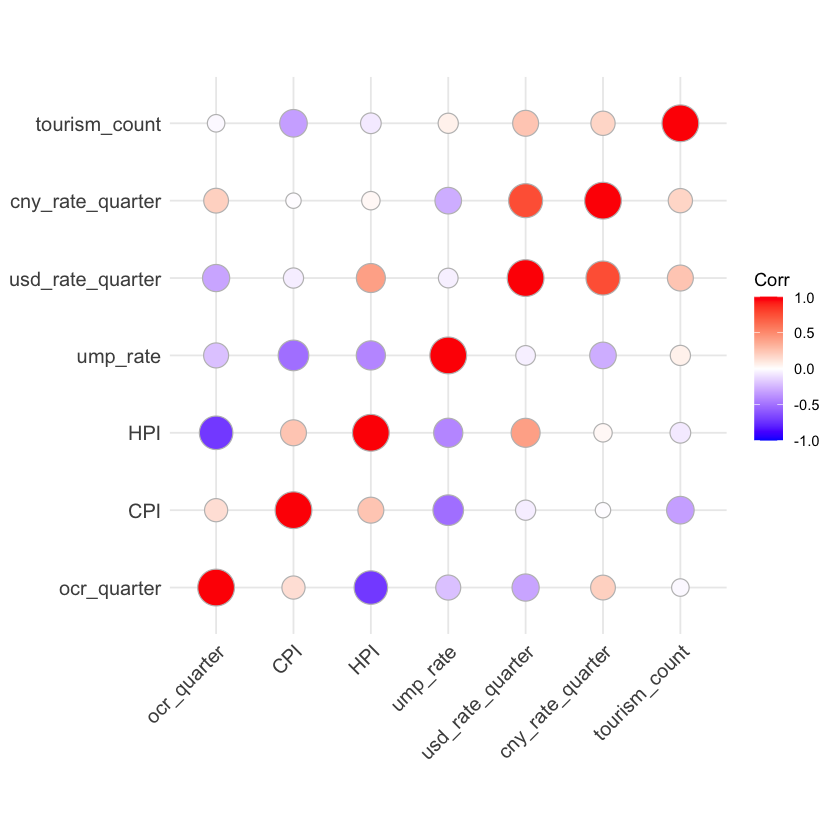

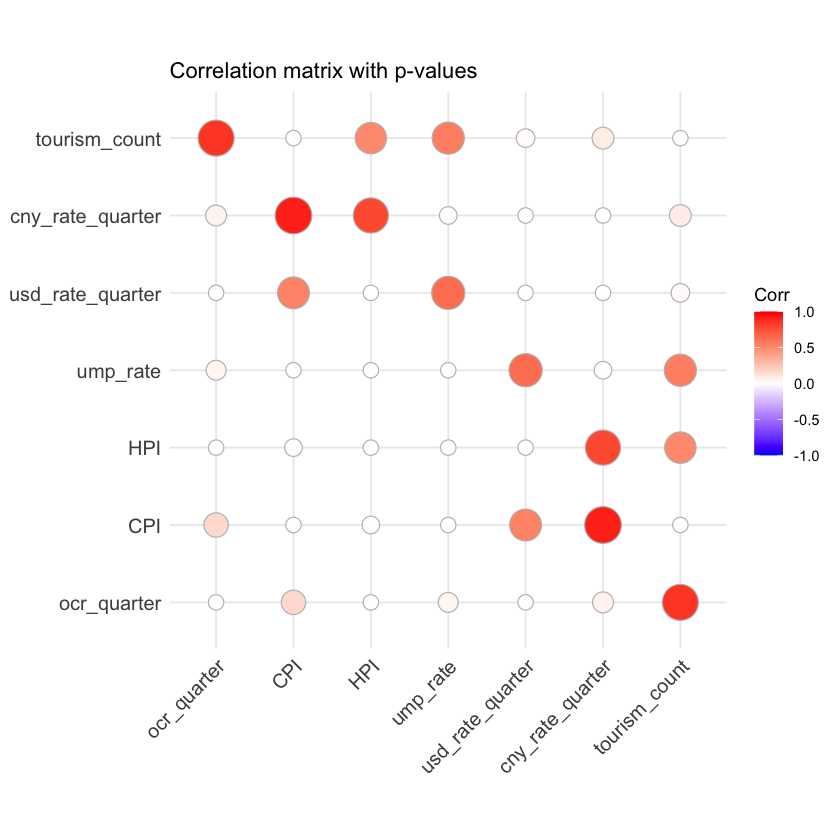

In [173]:
cor_data <- data %>% select(-date.quarter)
cor_data %>% glimpse()

# Computing correlation matrix
correlation_matrix <- round(cor(cor_data), 2)
  
# Computing correlation matrix with p-values
corrp.mat <- cor_pmat(cor_data)

# Visualizing the correlation matrix using 
# square and circle methods
# ggcorrplot(correlation_matrix, method ="square")
ggcorrplot(correlation_matrix, method ="circle")
ggcorrplot(corrp.mat, method ="circle", title = "Correlation matrix with p-values")

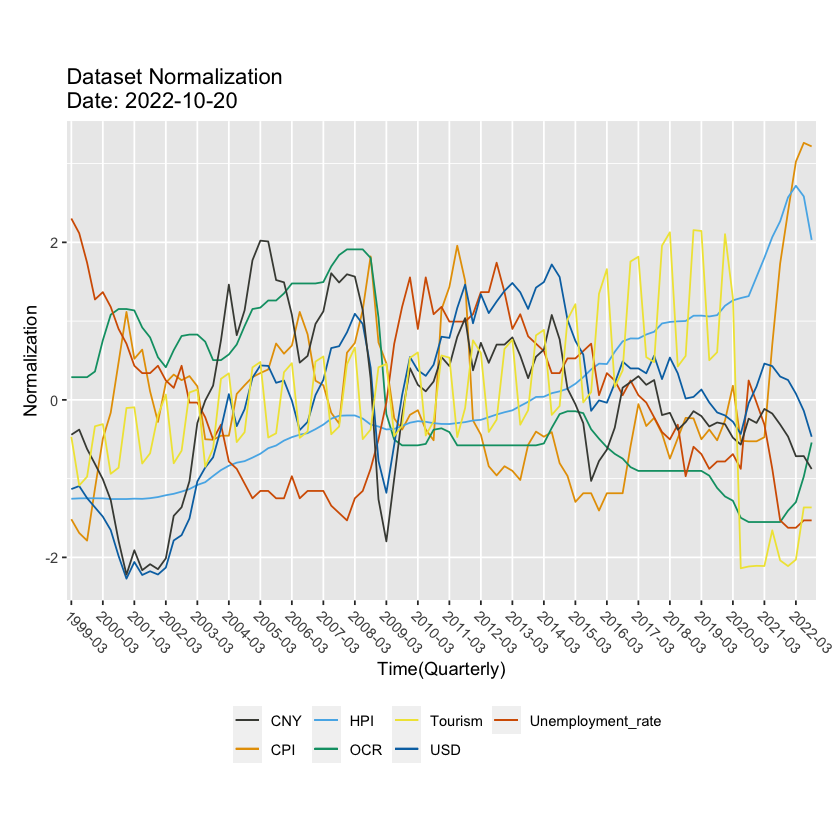

In [176]:
# The palette with black:
cbbPalette <- c("#474943", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

ggplot(data, aes(x = date.quarter, group = 1)) +
    geom_line(aes(y = scale(CPI, center = TRUE, scale = TRUE), col = "CPI")) +
    geom_line(aes(y = scale(ocr_quarter, center = TRUE, scale = TRUE), col = "OCR")) +
    geom_line(aes(y = scale(HPI, center = TRUE, scale = TRUE), col = "HPI")) +
    geom_line(aes(y = scale(ump_rate, center = TRUE, scale = TRUE), col = "Unemployment_rate")) +
    geom_line(aes(y = scale(usd_rate_quarter, center = TRUE, scale = TRUE), col = "USD")) +
    geom_line(aes(y = scale(cny_rate_quarter, center = TRUE, scale = TRUE), col = "CNY")) +
    geom_line(aes(y = scale(tourism_count, center = TRUE, scale = TRUE), col = "Tourism")) +
    scale_x_discrete(name = "Time(Quarterly)", breaks = x_breaks) +
    scale_y_continuous(name = "Normalization") + 
    scale_color_manual(values = cbbPalette) +
    theme(legend.position="bottom", plot.margin=grid::unit(c(0,5,0,5), "mm")) +
    theme(axis.text.x = element_text(angle = -45, hjust = 0.001)) + 
    coord_fixed(ratio = 10) +
    labs(color = " ", fill = " ", 
       title = paste0("Dataset Normalization \nDate: ", Sys.Date()))